# Data Cleaning Workbook

## James Christensen

## October 21st, 2025

### Loading, filtering, and inspecting the data

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
fulldata = pd.read_csv('data/medical_insurance.csv')
fulldata.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [4]:
columns_to_keep = ['person_id', 'total_claims_paid', 'bmi', 'smoker', 'alcohol_freq', 'urban_rural', 'employment_status', 'income']

reduced_data = fulldata[columns_to_keep]
reduced_data.head()

,person_id,total_claims_paid,bmi,smoker,alcohol_freq,urban_rural,employment_status,income
0,75722,4672.59,27.4,Never,NaN,Suburban,Retired,22700.0
1,80185,1189.08,26.6,Never,Weekly,Urban,Employed,12800.0
2,19865,0.00,31.5,Never,NaN,Rural,Retired,40700.0
3,76700,0.00,31.6,Never,NaN,Suburban,Self-employed,15600.0
4,92992,1002.24,30.5,Never,Daily,Suburban,Self-employed,89600.0


#### Analyzing missing values

In [5]:
reduced_data.isna().sum()

person_id                0
total_claims_paid        0
bmi                      0
smoker                   0
alcohol_freq         30083
urban_rural              0
employment_status        0
income                   0
dtype: int64

The only column with missing values is alcohol_frequency. There is a signficant number of missing values (30083). Later, we will do t-tests to evaluate if there is a significant difference between other columns when the alcohol_frequency is missing vs. not missing. This will help determine whether the values are missing at random or missing not at random

### Dealing with alcohol_frequency missing values

In [6]:
#t-test to determine whether bmi varies based on whether alcohol frequency is missing
missing = reduced_data[reduced_data['alcohol_freq'].isna()]
not_missing = reduced_data.dropna()

t_bmi, p_bmi = stats.ttest_ind(missing['bmi'], not_missing['bmi'], equal_var = True)

print(p_bmi)

0.8925267015476737


The p-value for the bmi test is 0.893. This suggests that if there is no difference between the means of bmi when alcohol frequency is missing, then we would expect a result as extreme or more 89.3% of the time. As such, at an alpha level of 0.05, we fail to reject the null hypothesis. As such, we conclude that there is no statistically significant difference between the two bmi groups

In [7]:
t_income, p_income = stats.ttest_ind(missing['income'], not_missing['income'], equal_var = True)

print(p_income)

0.7336489672151334


The p-value for the income test is 0.734. This suggests that if there is no difference between the means of income when alcohol frequency is missing, then we would expect a result as extreme or more 73.4% of the time. Therefore, at an alpha level of 0.05 we fail to reject the null hypothesis and conclude that there is no signficant difference between the two income groups.

In [8]:
t_claims, p_claims = stats.ttest_ind(missing['total_claims_paid'], not_missing['total_claims_paid'], equal_var = True)

print(p_claims)

0.569059720089097


The p-value for the claims paid test is 0.569. This means that if the means between in the total_claims_paid based on whether the alcohol_frequency is missing are the same we would expect a result as extreme or more extreme 56.9% of the time. As such, at an alpha level of 0.05, we fail to reject the null hypothesis and conclude that there isn't a difference in means for the two groups.

In [9]:
chi_data = reduced_data.copy()
chi_data['divide'] = reduced_data['alcohol_freq'].isna()
chi2_smoke, p_smoke, dof_smoke, expected_smoke = stats.chi2_contingency(pd.crosstab(chi_data['divide'], chi_data['smoker']))
print(p_smoke)

0.4704295315145113


The p-value for the Chi square smoke test is 0.470. This means that if the proportions between the groups are truly equal, then we would expect a result as extreme or more 47.0%. As such, we fail to reject the null hypothesis at an alpha level of 0.05, the hypothesis being that the proportions between the smoking data when alcohol frequency is missing and isn't missing are the same.

In [10]:
chi2_urban, p_urban, dof_urban, expected_urban = stats.chi2_contingency(pd.crosstab(chi_data['divide'], chi_data['urban_rural']))
print(p_urban)

0.07857170176162008


The p-value for the Chi square test between living environment and whether alcohol frequency is missing is 0.0786. This means that we would expect this result or one more extreme 7.86% of the time if the proportions between the groups are truly equal. As such, at an alpha level of 0.05, we fail to reject the null hypothesis which is that the proportions between the groups are equal. Therefore we accept that the groups depending on whether alcohol frequency is missing have the same proportions

In [11]:
chi2_employ, p_employ, dof_employ, expected_employ = stats.chi2_contingency(pd.crosstab(chi_data['divide'], chi_data['employment_status']))
print(p_employ)

0.7490018141966648


The p-value for the Chi square test between employment status and whether alcohol frequency is missing is 0.749. This means that we would expect this result or one more extreme 74.9% of the time, if the proportions were truly equal. As such, we fail to reject the null hypothesis and conclude that the proportions between the two groups are equal.

#### Conclusion

After performing each of these test individually, it seems appropriate to conclude that whether alcohol_frequency is missing is not associated with any of the other variables in the data. As such, we are left with two choices. We can either impute the class label using the other data points in the model. Or we can drop all the rows that have the alcohol_frequency missing.

Since there are 30000 rows missing alcohol frequency, it would usually be inappropriate to drop the values. However, there are 100000 rows in the dataset, so 70000 rows seems to have sufficient power. The loss of power shouldn't be too signficant. And since there is signficant association between the missing values and any of the variables, it doesn't appear that we would be missing any significant information by dropping the values. As such, I have elected to drop these missing values from the data.

In [12]:
#Current dataset after dropping the missing values.
not_missing

,person_id,total_claims_paid,bmi,smoker,alcohol_freq,urban_rural,employment_status,income
1,80185,1189.08,26.6,Never,Weekly,Urban,Employed,12800.0
4,92992,1002.24,30.5,Never,Daily,Suburban,Self-employed,89600.0
5,76435,1220.04,20.4,Never,Daily,Rural,Employed,305000.0
6,84005,0.00,21.6,Never,Occasional,Rural,Employed,38900.0
7,80918,1406.06,30.7,Never,Weekly,Suburban,Employed,83700.0
...,...,...,...,...,...,...,...,...
99992,87499,0.00,33.8,Current,Daily,Suburban,Self-employed,73500.0
99995,6266,0.00,28.2,Never,Occasional,Urban,Employed,127200.0
99996,54887,0.00,27.6,Never,Occasional,Suburban,Employed,21600.0
99997,76821,2500.48,29.8,Former,Weekly,Rural,Unemployed,81900.0


### Checking variables

In this section, I want to conduct exploratory data analysis. Starting with

#### total_claims_paid (Y)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
print(not_missing[not_missing['total_claims_paid'] == 0]['person_id'].count())
not_missing['total_claims_paid'].describe()

26261


count    69917.000000
mean      1375.155648
std       2292.005604
min          0.000000
25%          0.000000
50%        644.610000
75%       1799.240000
max      72517.950000
Name: total_claims_paid, dtype: float64

Not surprisingly, alot of the the values in this column are '0'. 26261 to be precise. This indicates that insurance didn't pay out anything for these individuals. It does however suggest that linear regression may not be appropriate without some variable transformation. However, for now it is noteworthy the standard deviation is. It is even greater than the mean. These issues are good to be aware of now as it allows us to prepare for the inevitably of using box-cox on the variable.

<Axes: ylabel='total_claims_paid'>

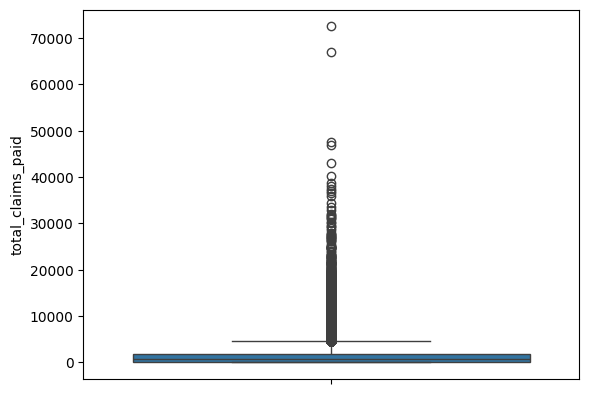

In [15]:
sns.boxplot(not_missing['total_claims_paid'])

There seems to be a tremendous number of outliers in the data. This makes sense as a little more than a third of the data is 0. It is also due to the standard deviation being so high. To counter balance this, we already intend on using box-cox later on to adjust the model, as this will almost certainly lead to violations of our model assumptions. Other than that, it does appear to be ok. There isn't any missing values and it makes sense for there to be a couple cases with tremendously greater payouts than the others. Later, we will look and see how much leverage these points have. If after transformation they still have too much, we will analyze them and go from there.

#### BMI

In [16]:
not_missing['bmi'].describe()

count    69917.000000
mean        26.991912
std          4.989552
min         12.000000
25%         23.600000
50%         27.000000
75%         30.400000
max         50.400000
Name: bmi, dtype: float64

Nothing in these numbers raises any alarms. From a Google Search, (in my report I will cite a source) the average bmi appears to be between 25-27, so our data doesn't look off. It also appears that the standard devation for both men and women appears to be around 5 as well. As such, it looks like our sample follows what we see in the population fairly closely.

<Axes: xlabel='bmi', ylabel='Density'>

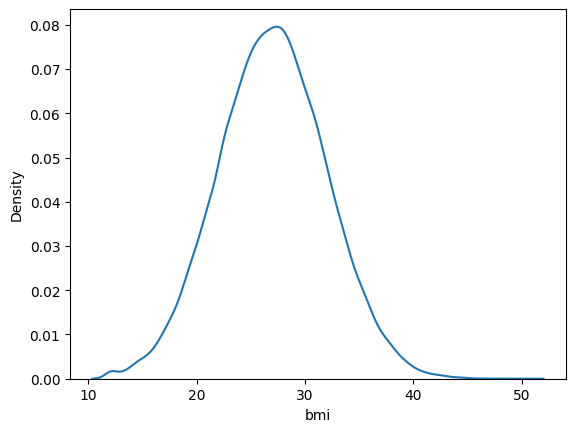

In [17]:
sns.kdeplot(not_missing['bmi'])


This distribution also looks like what I would expect from the population. The distribution looks normal with a slight right skew. As such, this variable doesn't appear to give me any concerns and I see no reason in proceeding with its use.

#### Smoker

In [18]:
print(not_missing['smoker'].value_counts())
not_missing['smoker'].describe()

smoker
Never      48661
Former     12761
Current     8495
Name: count, dtype: int64


count     69917
unique        3
top       Never
freq      48661
Name: smoker, dtype: object

These counts show us that most people have never smoked. More than two-thirds are in this category. As such, it makes sense to make this the baseline in our model. The chart below helps illustrate the proportions better

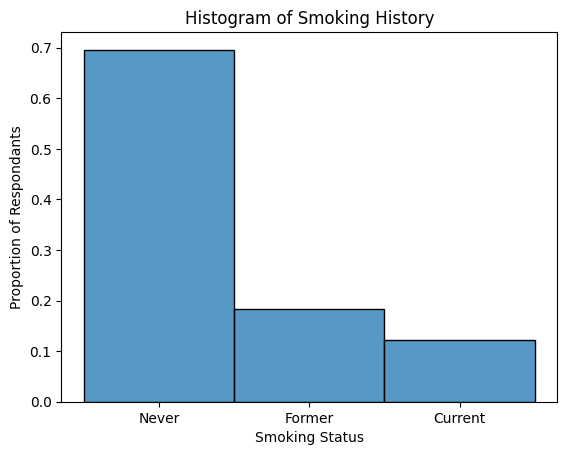

In [22]:
sns.histplot(not_missing['smoker'], stat = 'proportion')
plt.title('Histogram of Smoking History')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of Respondants')
plt.show()

From this chart, it looks like a little less than 20% are former smokers, so this will be the first encoded variable, while current smokers are probably about 15%. As such, I will have them be the second encoding.

#### Alcohol Frequency

In [ ]:
print(not_missing['alcohol_freq'].value_counts())
not_missing['alcohol_freq'].describe()

alcohol_freq
Occasional    45078
Weekly        19833
Daily          5006
Name: count, dtype: int64


count          69917
unique             3
top       Occasional
freq           45078
Name: alcohol_freq, dtype: object

I find it interesting that this dataset doesn't include a 'never' category. It begs the question, whether this category missing is where all of the missing values came from. This is probably not the case as there was no assocation between the missing values and any of the other variables, assuming that individuals who choose to not drink, also make other measurable health choices in contrast to the remainder of the population.

As it stands, the vast majority of individuals fit within the 'occasional' category. As such, this will be the base line with 'weekly' as the first encoded variable and 'daily' as the second.

<Axes: xlabel='alcohol_freq', ylabel='Proportion'>

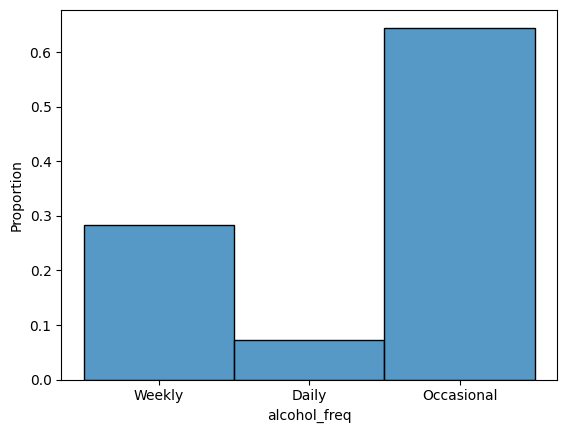

In [ ]:
sns.histplot(not_missing['alcohol_freq'], stat = 'proportion')


#### Urban_rural

In [ ]:
print(not_missing['urban_rural'].value_counts())
not_missing['urban_rural'].describe()

urban_rural
Urban       41840
Suburban    17635
Rural       10442
Name: count, dtype: int64


count     69917
unique        3
top       Urban
freq      41840
Name: urban_rural, dtype: object

The vast majority of the individuals in the dataset live in an urban environment. Due to this, we will make this the baseline with the first encoded variable being for 'suburban' and the second for 'rural'

<Axes: xlabel='urban_rural', ylabel='Proportion'>

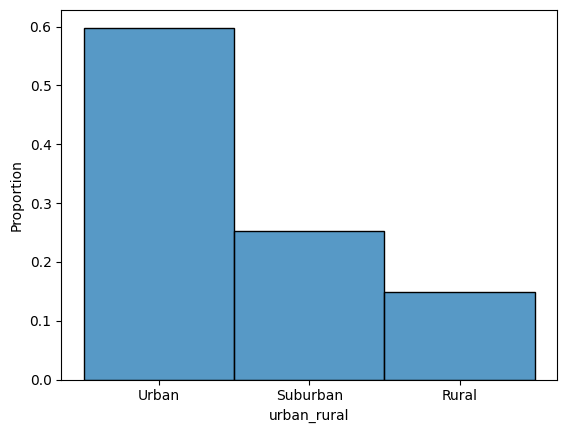

In [ ]:
sns.histplot(not_missing['urban_rural'], stat = 'proportion')

#### Employment Status

In [ ]:
print(not_missing['employment_status'].value_counts())
not_missing['employment_status'].describe()

employment_status
Employed         38621
Retired          13884
Unemployed        9023
Self-employed     8389
Name: count, dtype: int64


count        69917
unique           4
top       Employed
freq         38621
Name: employment_status, dtype: object

This variable will be an interesting one within the model. Employment status isn't completely in control of the individual, especially when it comes to retirement. Retirement is also likely consonant with age. As such, we can likely expect retired individuals to cost the insurance companies more, as health problems tend to arise with age. 

It also may make sense to combine the employed and self-employed statuses. Since both are working and thereby have an income, sense of purpose (however grand or miniscule it may be), and presumably, similar levels and kinds of stress, it seems fitting to group these two as they aren't completely different.

For now, we will set the baseline as employed/self-employed, with encodings for unemployed, and retired.

<Axes: xlabel='employment_status', ylabel='Proportion'>

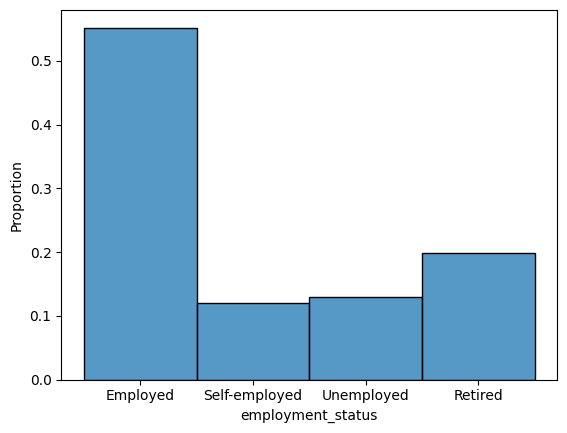

In [ ]:
sns.histplot(not_missing['employment_status'], stat = 'proportion')

#### Income

In [ ]:
not_missing['income'].describe()

count    6.991700e+04
mean     4.990694e+04
std      4.695854e+04
min      1.100000e+03
25%      2.110000e+04
50%      3.630000e+04
75%      6.210000e+04
max      1.061800e+06
Name: income, dtype: float64

These income figures make sense. The quartiles seem decently accurate with the average income about where we would expect it to be. The standard deviation is extremely high, so a variable transformation may be necessary.

<Axes: xlabel='income', ylabel='Density'>

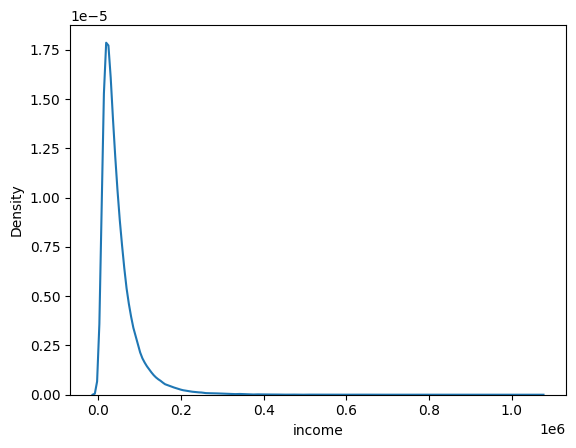

In [ ]:
sns.kdeplot(not_missing['income'])

This graph represents how we would expect income to be distributed. Income, is one of many variables that is modeled by the Pareto distribution. The Pareto distribution is a very right skewed distribution. Due to this skewness, it may be necessary to perform a transformation or regularization on this variable. We will first fit the model and then revisit whether this is appropriate.

## Finalizing the dataset

In this section, we will use the data we selected and proceed to verifying our model assumptions in a separate document

In [ ]:
finalDataSet = pd.DataFrame()

finalDataSet['person_id'] = not_missing['person_id']
finalDataSet['total_claims_paid'] = not_missing['total_claims_paid']
finalDataSet['income'] = not_missing['income']
finalDataSet['bmi'] = not_missing['bmi']
finalDataSet['smoke_former'] = not_missing['smoker'] == 'Former'
finalDataSet['smoker_current'] = not_missing['smoker'] == 'Current'
finalDataSet['alcohol_weekly'] = not_missing['alcohol_freq'] == 'Weekly'
finalDataSet['alcohol_daily'] = not_missing['alcohol_freq'] == 'Daily'
finalDataSet['suburban'] = not_missing['urban_rural'] == 'Suburban'
finalDataSet['rural'] = not_missing['urban_rural'] == 'Rural'
finalDataSet['unemployed'] = not_missing['employment_status'] == 'Unemployed'
finalDataSet['retired'] = not_missing['employment_status'] == 'Retired'

finalDataSet.head()

,person_id,total_claims_paid,income,bmi,smoke_former,smoker_current,alcohol_weekly,alcohol_daily,suburban,rural,unemployed,retired
1,80185,1189.08,12800.0,26.6,False,False,True,False,False,False,False,False
4,92992,1002.24,89600.0,30.5,False,False,False,True,True,False,False,False
5,76435,1220.04,305000.0,20.4,False,False,False,True,False,True,False,False
6,84005,0.00,38900.0,21.6,False,False,False,False,False,True,False,False
7,80918,1406.06,83700.0,30.7,False,False,True,False,True,False,False,False


In [ ]:
finalDataSet.to_csv('cleaned_data.csv', index = False)